# Árboles de Decisión

## <span style="color:green">1. Clasificación</span>

In [14]:
#Importar los bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [15]:
url='https://raw.githubusercontent.com/jofsanchezci/ML_A/main/comediantes.csv'
df=pd.read_csv(url)

In [16]:
df

,index,Age,Experience,Rank,Nationality,Go
0,0,36,10,9,UK,NO
1,1,42,12,4,USA,NO
2,2,23,4,6,N,NO
3,3,52,4,4,USA,NO
4,4,43,21,8,USA,YES
5,5,44,14,5,UK,NO
6,6,66,3,7,N,YES
7,7,35,14,9,UK,YES
8,8,52,13,7,N,YES
9,9,35,5,9,N,YES


In [17]:
#Utiliza el label_encoder para asignar un valor numérico a Nacionalidad y a Go
from sklearn.preprocessing import LabelEncoder

def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

variables = ["Nationality","Go"]

for l in variables:
    label_encoder(l)
#verifica que las variables "Nacionality" y "Go" se cambiaron a valores numéricos
df

,index,Age,Experience,Rank,Nationality,Go
0,0,36,10,9,1,0
1,1,42,12,4,2,0
2,2,23,4,6,0,0
3,3,52,4,4,2,0
4,4,43,21,8,2,1
5,5,44,14,5,1,0
6,6,66,3,7,0,1
7,7,35,14,9,1,1
8,8,52,13,7,0,1
9,9,35,5,9,0,1


In [18]:
#Separa en dos partes el dataframe
y = df["Go"]
x = df.drop("Go",axis=1)

In [21]:
#verifica que se haya hecho la separación
print(x)
print('----------------------------------------')
print(y)


    index  Age  Experience  Rank  Nationality
0       0   36          10     9            1
1       1   42          12     4            2
2       2   23           4     6            0
3       3   52           4     4            2
4       4   43          21     8            2
5       5   44          14     5            1
6       6   66           3     7            0
7       7   35          14     9            1
8       8   52          13     7            0
9       9   35           5     9            0
10     10   24           3     5            2
11     11   18           3     7            1
12     12   45           9     9            1
----------------------------------------
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


In [22]:
#Importa la función
from sklearn.tree import DecisionTreeClassifier
#Haz el objeto
arbol = DecisionTreeClassifier()
    #Haz el ajuste
arbol.fit(x,y)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.5, 'index <= 2.0\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

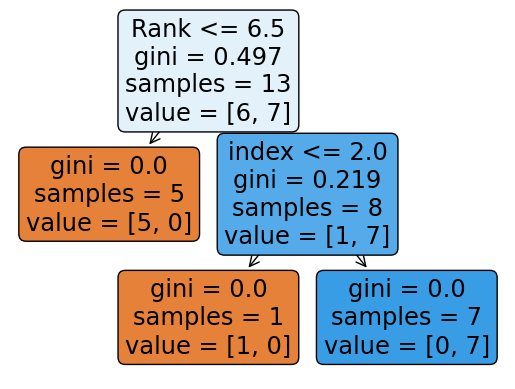

In [23]:
#Gráfica el árbol de decisión
from sklearn import tree
tree.plot_tree(arbol,feature_names=x.columns,rounded=True,filled=True)

***

## <span style="color:green">2. Probabilidades</span>

También permite estimar probabilidades.

In [29]:
#Selecciona una persona aleatoria para estimar su probabilidad y juega con las variables
p_A=arbol.predict_proba([[14,40,6,7,1]])
print(p_A)


[[0. 1.]]
<class 'numpy.ndarray'>


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


 -El orden de las variables esta como: *Index, Edad, experiencia, rango y nacionalidad*

El resultado esta como : lado izquierdo= No comediante - lado derecho=Comediante

---

[Text(0.4, 0.8333333333333334, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.5, 'index <= 2.0\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

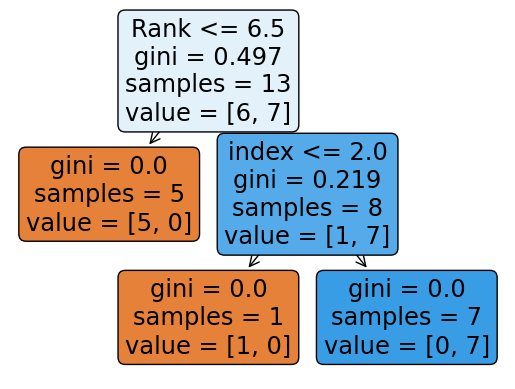

In [30]:
#Prueba ajustando el hiperparametro de max_leaf_nodes=3
#Importa la función
from sklearn.tree import DecisionTreeClassifier
#Haz el objeto
arbol = DecisionTreeClassifier(max_leaf_nodes=3)
    #Haz el ajuste
arbol.fit(x,y)
tree.plot_tree(arbol,feature_names=x.columns,rounded=True,filled=True)

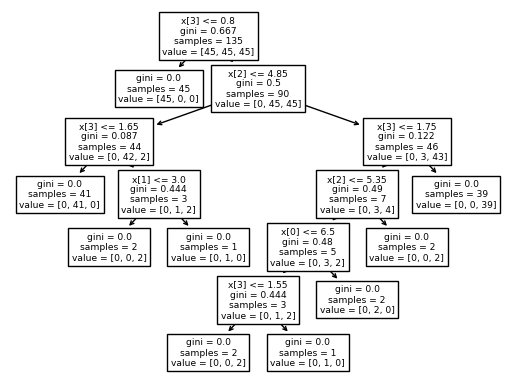

In [31]:
#Hacer la peueba con los datos de iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.1,random_state=123, stratify=y)
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
tree.plot_tree(clf)
plt.show()

In [32]:
clf.predict(X_test)

array([2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2])

In [33]:
print(y_test)
print(clf.predict(X_test))

[2 1 0 0 2 2 1 0 0 0 2 1 1 1 2]
[2 1 0 0 2 2 1 0 0 0 2 2 1 1 2]


In [37]:
clf.score(X_test,y_test)

0.9333333333333333

## <span style="color:green">3. Regresión</span>

Los árboles de decisión tambien pueden hacer regresiones lineales.

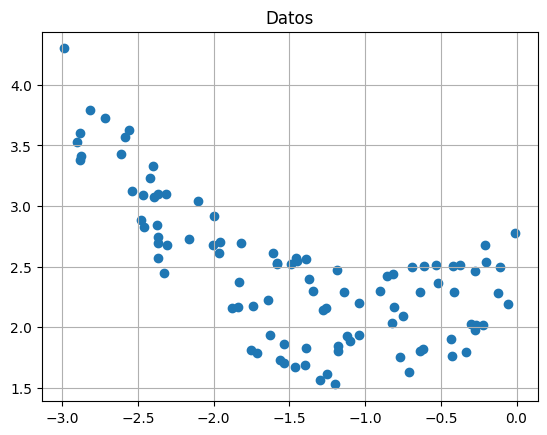

In [40]:
#Genera 100 número aleatorios y añade un poco de aleatoriedad
m = 100
x = 3 * np.random.rand(m,1) - 3
y = 2 + x + 0.5*x**2 + np.random.rand(m,1)
#np.c_[([x])]
plt.scatter(x,y)
plt.title('Datos')
plt.grid()
plt.show()

In [41]:
#Crea un  árbol de decisión con un hiperparametro de 2
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor(max_depth=2)
arbol.fit(x,y)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[0] <= -1.921\nsquared_error = 0.332\nsamples = 100\nvalue = 2.455'),
 Text(0.25, 0.5, 'x[0] <= -2.548\nsquared_error = 0.183\nsamples = 31\nvalue = 3.122'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.065\nsamples = 10\nvalue = 3.636'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.054\nsamples = 21\nvalue = 2.878'),
 Text(0.75, 0.5, 'x[0] <= -0.214\nsquared_error = 0.108\nsamples = 69\nvalue = 2.155'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.102\nsamples = 63\nvalue = 2.122'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.042\nsamples = 6\nvalue = 2.497')]

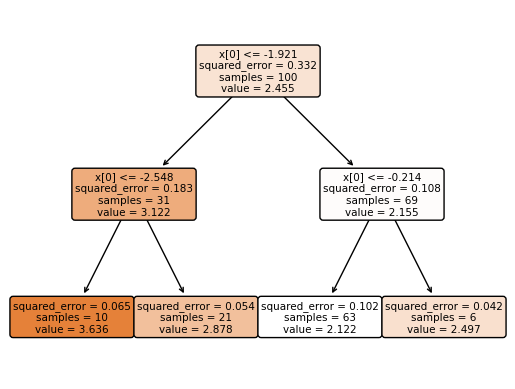

In [42]:
#Dale formato al arbol
tree.plot_tree(arbol,rounded=True,filled=True)

Recuerda que pusimos una profundidad máxima de 2, esto lo decides tu con base a tus objetivos.

KEY: **mse**= Mean Square Error es equivalente al GINI. Te indica el nivel de impureza. **nsamples=** Cantidad de muestras por nodo. **nvalue=** Valor

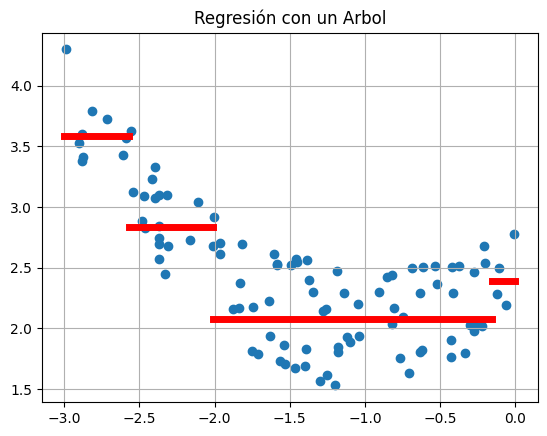

In [44]:
#Hacer gráfica
x1 = np.linspace(-3,-2.568)
y1 = np.linspace(3.5818,3.5818)
x2 = np.linspace(-2.569,-2.008)
y2 = np.linspace(2.834,2.834)
x3 = np.linspace(-2.009,-0.151)
y3 = np.linspace(2.075,2.075)
x4 = np.linspace(-0.152,0)
y4 = np.linspace(2.392,2.392)
plt.scatter(x,y)
plt.plot(x1,y1,"r-",linewidth=5)
plt.plot(x2,y2,"r-",linewidth=5)
plt.plot(x3,y3,"r-",linewidth=5)
plt.plot(x4,y4,"r-",linewidth=5)
plt.grid()
plt.title('Regresión con un Arbol')
plt.show()

Los nodos se ven representados por cada linea rojo

[Text(0.5, 0.875, 'x[0] <= -1.921\nsquared_error = 0.332\nsamples = 100\nvalue = 2.455'),
 Text(0.25, 0.625, 'x[0] <= -2.548\nsquared_error = 0.183\nsamples = 31\nvalue = 3.122'),
 Text(0.125, 0.375, 'x[0] <= -2.945\nsquared_error = 0.065\nsamples = 10\nvalue = 3.636'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 4.299'),
 Text(0.1875, 0.125, 'squared_error = 0.018\nsamples = 9\nvalue = 3.562'),
 Text(0.375, 0.375, 'x[0] <= -2.384\nsquared_error = 0.054\nsamples = 21\nvalue = 2.878'),
 Text(0.3125, 0.125, 'squared_error = 0.027\nsamples = 7\nvalue = 3.081'),
 Text(0.4375, 0.125, 'squared_error = 0.037\nsamples = 14\nvalue = 2.776'),
 Text(0.75, 0.625, 'x[0] <= -0.214\nsquared_error = 0.108\nsamples = 69\nvalue = 2.155'),
 Text(0.625, 0.375, 'x[0] <= -1.572\nsquared_error = 0.102\nsamples = 63\nvalue = 2.122'),
 Text(0.5625, 0.125, 'squared_error = 0.085\nsamples = 12\nvalue = 2.249'),
 Text(0.6875, 0.125, 'squared_error = 0.101\nsamples = 51\nvalue = 2.092'),
 Text(

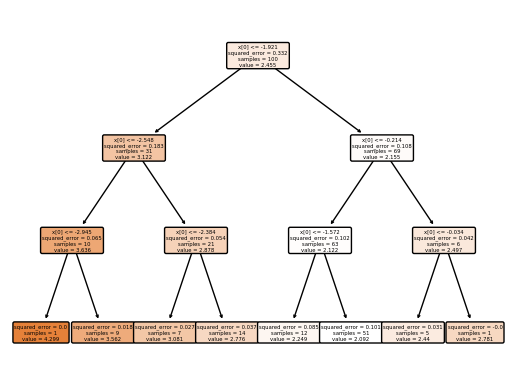

In [45]:
#Arreglar el sobreajuste poniendo una profundidad máxima mayor a la anterior. Ej: 3.
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor(max_depth=3)
arbol.fit(x,y)
#Gráficalo
tree.plot_tree(arbol,rounded=True,filled=True)
#tree.plot_tree(arbol,rounded=True,filled=True,fontsize=15)Para hacer más grande la letra ajustar fontsize

In [46]:
#Haz un árbol de decisiones sin restricciones
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor()
arbol.fit(x,y)

DecisionTreeRegressor()

[Text(0.3451974877813981, 0.9722222222222222, 'x[0] <= -1.921\nsquared_error = 0.332\nsamples = 100\nvalue = 2.455'),
 Text(0.1338862559241706, 0.9166666666666666, 'x[0] <= -2.548\nsquared_error = 0.183\nsamples = 31\nvalue = 3.122'),
 Text(0.052132701421800945, 0.8611111111111112, 'x[0] <= -2.945\nsquared_error = 0.065\nsamples = 10\nvalue = 3.636'),
 Text(0.04265402843601896, 0.8055555555555556, 'squared_error = 0.0\nsamples = 1\nvalue = 4.299'),
 Text(0.061611374407582936, 0.8055555555555556, 'x[0] <= -2.848\nsquared_error = 0.018\nsamples = 9\nvalue = 3.562'),
 Text(0.037914691943127965, 0.75, 'x[0] <= -2.881\nsquared_error = 0.008\nsamples = 4\nvalue = 3.48'),
 Text(0.02843601895734597, 0.6944444444444444, 'x[0] <= -2.884\nsquared_error = 0.009\nsamples = 3\nvalue = 3.503'),
 Text(0.018957345971563982, 0.6388888888888888, 'x[0] <= -2.894\nsquared_error = 0.006\nsamples = 2\nvalue = 3.453'),
 Text(0.009478672985781991, 0.5833333333333334, 'squared_error = 0.0\nsamples = 1\nvalue = 

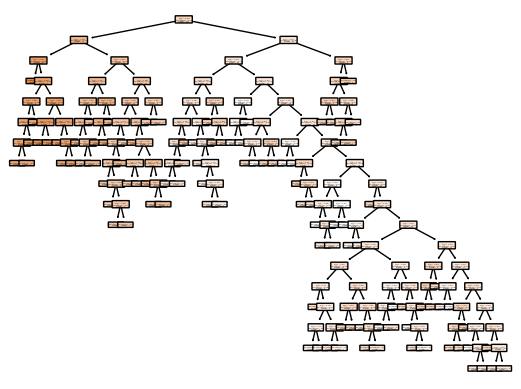

In [47]:
#Gráficalo y asómbrate
tree.plot_tree(arbol,rounded=True,filled=True)